In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import VerticalPitch

In [2]:
conn = sqlite3.connect("Databases\Players\BorussiaDortmund\ErlingHaaland\ErlingHaaland_All_Shots_Data.db")
sql_query = """SELECT date, minute, result, h_a, X, Y,
    CAST(xG AS REAL)*500 as scaled_xg,
    X*120 AS y,
    (1-Y)*80 AS x
    FROM ErlingHaaland_All_Shots_Data
    WHERE 
        ((h_team IS 'Borussia Dortmund' AND a_team IS 'Bayern Munich') OR
        (h_team IS 'Bayern Munich' AND a_team IS 'Borussia Dortmund'))
    """
data = pd.read_sql(sql_query, conn)
conn.close()

data_goals = data.loc[data.result == 'Goal']
data_nongoals = data.loc[data.result != 'Goal']
data_goals

,date,minute,result,h_a,X,Y,scaled_xg,y,x
8,2020-11-07 17:30:00,82,Goal,h,0.9269999694824219,0.6170000076293946,127.018228,111.239996,30.639999
9,2021-03-06 17:30:00,1,Goal,a,0.7830000305175782,0.549000015258789,19.231115,93.960004,36.079999
10,2021-03-06 17:30:00,8,Goal,a,0.9569999694824218,0.5540000152587891,324.782282,114.839996,35.679999
12,2021-12-04 17:30:00,47,Goal,h,0.9009999847412109,0.655,35.320334,108.119998,27.600000


In [3]:
goals = [data_goals.x.values.tolist(), data_goals.y.values.tolist(), data_goals.scaled_xg.values.tolist()]
nongoals = [data_nongoals.x.values.tolist(), data_nongoals.y.values.tolist(), data_nongoals.scaled_xg.values.tolist()]

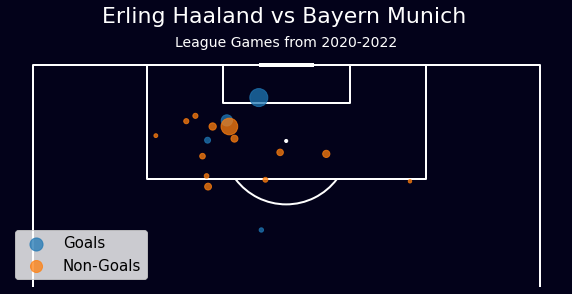

In [7]:
fig, axs = plt.subplots(figsize=(10, 10))
fig.patch.set_facecolor('#03021a') 
pitch = VerticalPitch(pitch_color='#03021a', line_color='white', half=True, pad_bottom=-25)
pitch.draw(ax=axs)

plt.scatter(goals[0], goals[1], goals[2], alpha=0.75, label = 'Goals')
plt.scatter(nongoals[0], nongoals[1], nongoals[2], alpha =0.75, label = 'Non-Goals')
plt.suptitle('Erling Haaland vs Bayern Munich', y=0.72, x=0.51, fontsize=22, color='w')
plt.title('League Games from 2020-2022', y=0.95, fontsize=14, color='w')
plt.legend(loc="lower left", fontsize = 15, markerscale = 1)
plt.show()